# Exploring Tweets data for monitoring Disaster using the exploratory data analysis (EDA) notebook

##### Brief summary of this prohect here

This notebook owns...

##### The proposed EDA approach to analysis the twitter messages is divided as follows: 
- Import the libraries
- Input Data
- Basic Informations
- Clean the data
- Feature Engineering
- Analizing Data
- Process Data


### Import the libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
from nltk.stem import PorterStemmer 
from pylab import rcParams

# Importing the required parameter for plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
import re

### Input Data

The train dataset has the following columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this feature denotes whether a tweet is about a real disaster (1) or not (0)


In [3]:
df = pd.read_csv('Data/train.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object, 'target': int})
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### Basic Informations

In [4]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 238.0+ KB


In [5]:
df.describe( )

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

##### Observations

- There is a total of 7613 entries (train)
- There are numerous blanks in the dataset that need to be replaced with NA


### Clean Data

#### Removing rows, which own non-numerical values in the target column

In [8]:
df[pd.to_numeric(df['target'], errors='coerce').notnull()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### Removing rows, which have not 1 and 0 values in target column

In [9]:
def is_valid_number(x):
    if x == 1 or x == 0:
        return True
    else:
        return True
df[df['target'].apply(lambda x: is_valid_number(x))]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### Removing punctuations and numbers

In [10]:
df['text_clean'] = df['text'].str.replace('[^\w\s]', '', regex=True).str.replace('\d+', '', regex=True)
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


#### Removing uppercase

In [11]:
df['text_clean']=df['text_clean'].apply(lambda x: x.lower())
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#### Removing hyperlink

In [103]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16,86


#### Removing square brackets

In [104]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('\[.*?\]', '', x))
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('<.*?>+', '', x))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16,86


### Feature Engineering

#### Counting the number of words

In [12]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16


#### Adding the text length 

In [13]:
df['size'] = df['text_clean'].apply(lambda x: len(x))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16,86


### Analizing Data

#### Number of Tweets with disasters (1) and non-disasters (0)

<AxesSubplot:ylabel='target'>

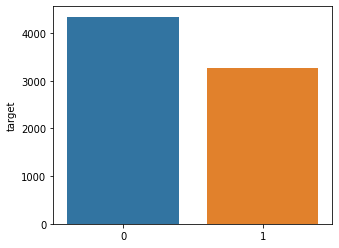

In [63]:
df_target = df['target'].value_counts().to_frame()

## seaborn barplot to display barchart
rcParams['figure.figsize'] = 5, 4
sns.barplot(data=df_target, x=df_target.index, y="target")

#### Top ten locations 

<AxesSubplot:>

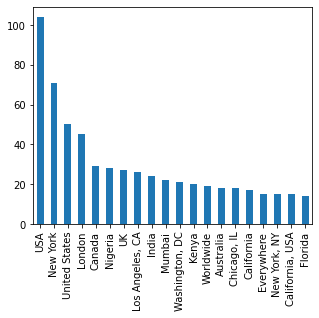

In [64]:
top_location = df["location"].value_counts().head(20)
top_location.plot(kind='bar')

#### Histogram of the text size 

<AxesSubplot:>

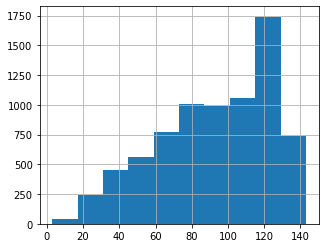

In [65]:
df['size'].hist()

#### Histogram of the number words

<AxesSubplot:>

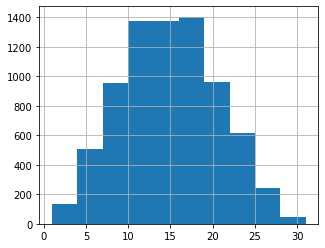

In [66]:
df['word_count'].hist()

#### Histogram of the average word length

<AxesSubplot:>

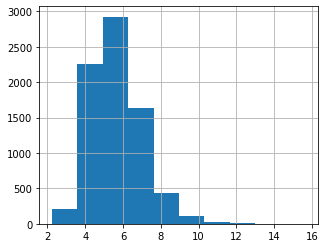

In [67]:
df['text_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### Process data

#### Word tokenization

In [68]:
AllReviews = df['text_clean']
AllReviews.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text_clean, dtype: object

In [69]:
review_words_lengths = AllReviews.apply(lambda x: len(nltk.word_tokenize(x)))

#### Sentences with two words

In [70]:
AllReviews[review_words_lengths[review_words_lengths == 2].index].head(5)

22                       love skiing
30                           the end
113    aftershock httpstcoxmwodfmtui
131      aftershock httpstcojvppkhjy
276                apocalypse please
Name: text_clean, dtype: object

#### Max and min values in the number of words

In [71]:
print("Minimun number of words", min(review_words_lengths))
print("Maximum number of words", max(review_words_lengths))

Minimun number of words 1
Maximum number of words 31


#### Histogram of the tokenization words

<AxesSubplot:>

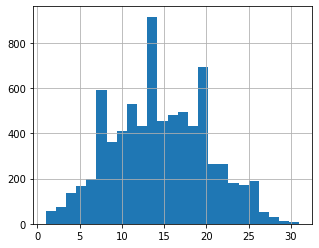

In [74]:
## Setting the resolution for better clarity 
review_words_lengths.hist(bins = 25)

#### Text visualization with word clouds

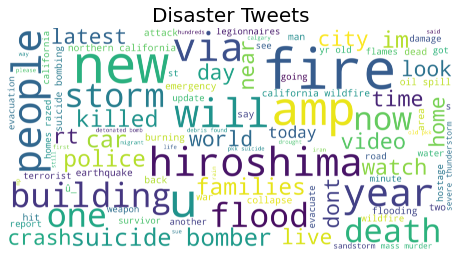

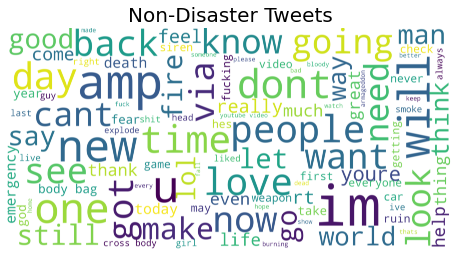

In [112]:
def word_cloud_rating(data, target_value, title):
    
    data_filtered = data[data.target == target_value] #filtering according to the star value
    Reviews = data_filtered.text_clean

    Reviews_text = ' '.join(Reviews.values) #joining all the words together

    # Creating a word cloud object
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",scale = 10,width=800, height=400).generate(Reviews_text)

    # Plotting the generated word cloud

    plt.figure(figsize=(8, 19))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=20);
    plt.axis("off")
    plt.show()
    
##### Filtering by target equal 1    
word_cloud_rating(df, 1, 'Disaster Tweets')

##### Filtering by target equal 0    
word_cloud_rating(df, 0, 'Non-Disaster Tweets')

#### Most common keywords

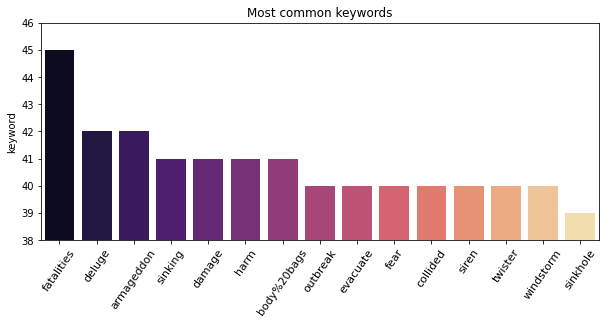

In [111]:
common_keywords = df["keyword"].value_counts().to_frame().head(15)
fig = plt.figure(figsize=(10,4))
sns.barplot(data=common_keywords, x=common_keywords.index, y="keyword",palette="magma")
plt.ylim(38, 46)
plt.title("Most common keywords")
plt.xticks(rotation=55, size=11);

#### Stop words

In [148]:
# data_filtered = df[df.target == 1] #filtering according to the star value
# Reviews = data_filtered.text_clean

# Reviews_text = ' '.join(Reviews.values) #joining all the words together
# Reviews_text
counter = Counter()
for text in df['text'].values:
    for word in text.split():
        counter[word] += 1
counter.most_common(10)

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773)]

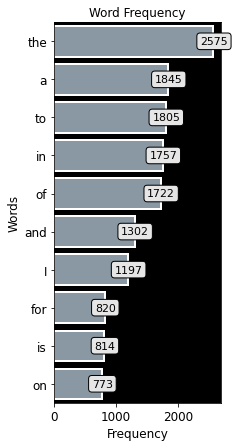

In [157]:
data = dict(sorted(counter.items(), key = lambda x: x[1] ,reverse = True)[:10])
words = list(data.keys())
frequency = list(data.values())
frequency

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 7))
ax.set_facecolor('black')
ax = sns.barplot(x = frequency, y = words, color = '#8699A7', edgecolor = 'white', linewidth = 2)
plt.title('Word Frequency', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
    width = p.get_width()
    plt.text(9.5 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 11)
plt.show()

## Summary
- The location column has different types of data such as full addresses, country names, state names, to irrelevant inputs

In [77]:
df.head()

,id,keyword,location,text,target,text_clean,word_count,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16,86
